In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import random
import math
from math import sqrt
import copy
import time

In [46]:
# create dataset
X, y = make_blobs(
   n_samples=10000, n_features=2,
   centers=3, cluster_std=3,
   shuffle=True, random_state=4
)
df = pd.DataFrame(X)
df["label"] = y
df.rename(columns={0:"x1", 1:"x2"}, inplace=True)

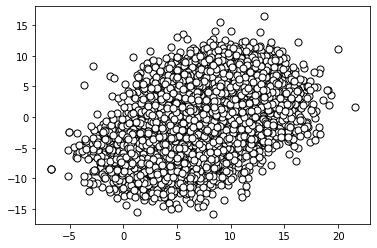

In [42]:
# plot
plt.scatter(
   X[:, 0], X[:, 1],
   c='white', marker='o',
   edgecolor='black', s=50
)
plt.show()

In [43]:
km = KMeans(
    n_clusters=3, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=42
)
y_km = km.fit_predict(X)

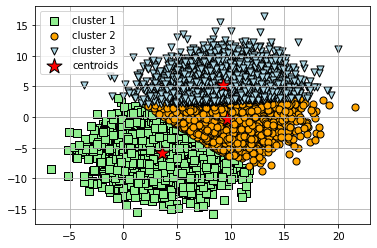

In [44]:
# plot the 3 clusters
plt.scatter(
    X[y_km == 0, 0], X[y_km == 0, 1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    X[y_km == 1, 0], X[y_km == 1, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    X[y_km == 2, 0], X[y_km == 2, 1],
    s=50, c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 3'
)

# plot the centroids
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

In [6]:
### K-Means

In [51]:
#Number of clusters, number of iterations and early stopping need to be specified beforehand. 
#Number of clusters k 
k  = 3

#Number if iterations till convergence n_iter
n_iter = 100

#Early stopping criterion
epsilon = 0.1


In [52]:
#First: Randomly choose k centroids in the range of the features. 
#To do so we first determine the minimum and maximum values per feature:
nr_features = X.shape[1]

#Function to extract the minimum and maximum value of a feature
def minmax(val_list):
    min_val = min(val_list)
    max_val = max(val_list)

    return (min_val, max_val)

#Array to store the min and max values
min_max = []

#Iterate over all features to fill min_max array with each minium and maximum value
for i in range(nr_features):
    min_max.append(minmax(X[:,i]))

#Based on the number of predetermined clusters k, generate k random centroids within the range
centroids = {}

for i in range(k):
    temp = []
    for j in range(nr_features):
        temp.append(random.randint(math.ceil(min_max[j][0]), math.floor(min_max[j][1])))
    centroids[i] = temp

No handles with labels found to put in legend.


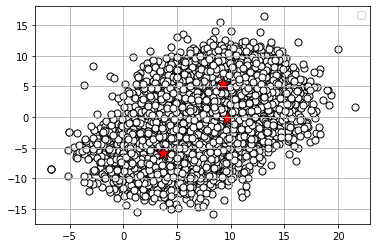

In [55]:
#For visualization (only works 2D)
# plot points
plt.scatter(
   X[:, 0], X[:, 1],
   c='white', marker='o',
   edgecolor='black', s=50
)
# plot the centroids
for i in range(k):
    plt.scatter(
        centroids[i][0], centroids[i][1],
        s=250, marker='*',
        c='red', edgecolor='black',
    )
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

In [54]:
#Repeat the following steps until maximum number of iterations is reached or convergence is achieved:
start_time = time.time()
for n in range(n_iter):
    #Second: For each training instance we calculate the euclidian distance from all centroids. 
    #Each instance is assigned to the closest centroid (euclidian distance). This information is stored in dictionary C
    C = {}

    for i in range(k):
        C[i] = []
    #Iterate over whole dataset
    for i in range(X.shape[0]):
        temp = {}
        #Iterate over number of clusters:
        for j in range(k):
            temp[j]=(sqrt(sum( (a - b)**2 for a, b in zip(X[i], centroids[j]))))
        C[(min(temp, key=temp. get))].append(X[i])
    
    #Create independent copy of centroids to later use for early stopping
    prev_centroids = copy.deepcopy(centroids) 
    
    #Third: Update the centroid of each cluster by moving the centroid to the middle of its cluster
    for i in range(k): 
        for j in range(nr_features):
            centroids[i][j] = np.mean(list(list(zip(*C[i]))[j]))

    #Forth: check whether centroids moved - if movment smaller than epsilon: interupt
    temp = []
    for i in range(k):
        temp.append(sum(np.subtract(centroids[i],prev_centroids[i])))
    if np.abs(sum(temp)) < epsilon:
        print(f"Ealry stopping reached after {n} iterations")
        break
print("--- %s seconds ---" % (time.time() - start_time))

Ealry stopping reached after 9 iterations
--- 3.822646141052246 seconds ---


In [56]:
class KMeansClustering:
    def __init__(self, X, num_clusters):
        self.K = num_clusters
        self.max_iterations = 100
        self.plot_figure = True
        self.num_examples = X.shape[0]
        self.num_features = X.shape[1]

    def initialize_random_centroids(self, X):
        centroids = np.zeros((self.K, self.num_features))

        for k in range(self.K):
            centroid = X[np.random.choice(range(self.num_examples))]
            centroids[k] = centroid

        return centroids

    def create_clusters(self, X, centroids):
        # Will contain a list of the points that are associated with that specific cluster
        clusters = [[] for _ in range(self.K)]

        # Loop through each point and check which is the closest cluster
        for point_idx, point in enumerate(X):
            closest_centroid = np.argmin(
                np.sqrt(np.sum((point - centroids) ** 2, axis=1))
            )
            clusters[closest_centroid].append(point_idx)

        return clusters

    def calculate_new_centroids(self, clusters, X):
        centroids = np.zeros((self.K, self.num_features))
        for idx, cluster in enumerate(clusters):
            new_centroid = np.mean(X[cluster], axis=0)
            centroids[idx] = new_centroid

        return centroids

    def predict_cluster(self, clusters, X):
        y_pred = np.zeros(self.num_examples)

        for cluster_idx, cluster in enumerate(clusters):
            for sample_idx in cluster:
                y_pred[sample_idx] = cluster_idx

        return y_pred

    def plot_fig(self, X, y):
        plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
        plt.show()

    def fit(self, X):
        centroids = self.initialize_random_centroids(X)

        for it in range(self.max_iterations):
            clusters = self.create_clusters(X, centroids)

            previous_centroids = centroids
            centroids = self.calculate_new_centroids(clusters, X)

            diff = centroids - previous_centroids

            if not diff.any():
                print("Termination criterion satisfied")
                break

        # Get label predictions
        y_pred = self.predict_cluster(clusters, X)

        if self.plot_figure:
            self.plot_fig(X, y_pred)

        return y_pred


Termination criterion satisfied


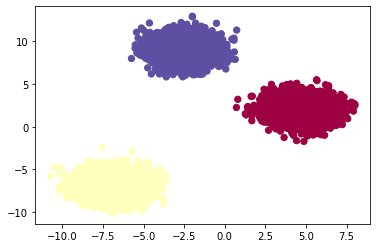

--- 1.5550429821014404 seconds ---


In [57]:
if __name__ == "__main__":
    np.random.seed(42)
    num_clusters = 3
    X, _ = make_blobs(n_samples=10000, n_features=2, centers=num_clusters)
    start_time = time.time()
    Kmeans = KMeansClustering(X, num_clusters)
    y_pred = Kmeans.fit(X)
    print("--- %s seconds ---" % (time.time() - start_time))

In [59]:
self.K

NameError: name 'self' is not defined

In [12]:
start

1633958879.7368193